In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import os
import random
from sklearn.manifold import TSNE
# import os
# os.environ["LOKY_MAX_CPU_COUNT"] = "4"

def load_random_samples(path, n):
    files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.npy')]
    sample_files = random.sample(files, min(n, len(files)))
    samples = [np.load(file).flatten() for file in sample_files]
    return samples

def plot_tsne(base_path, classes, n_samples, psd=False, perplexity=25, learning_rate=200):
    plt.figure(figsize=(10, 6))
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=5)
    colors = plt.colormaps['tab10']
    
    all_samples = []
    labels = []
    
    for idx, class_name in enumerate(classes):
        path = os.path.join(base_path, class_name)
        samples = load_random_samples(path, n_samples)
        if psd:
            samples = [signal.welch(sample, fs=250)[1][:70] for sample in samples]
            samples = [np.log(sample) for sample in samples]
        if samples:
            all_samples.extend(samples)
            labels.extend([class_name] * len(samples))
    
    tsne_results = tsne.fit_transform(np.array(all_samples))
    
    for idx, class_name in enumerate(classes):
        class_samples = tsne_results[np.array(labels) == class_name]
        plt.scatter(class_samples[:, 0], class_samples[:, 1], label=class_name, color=colors(idx), alpha=0.75)
    
    plt.title('t-SNE Visualization of Classes')
    plt.xlabel('t-SNE Axis 1')
    plt.ylabel('t-SNE Axis 2')
    plt.legend(title='Class')
    plt.show()

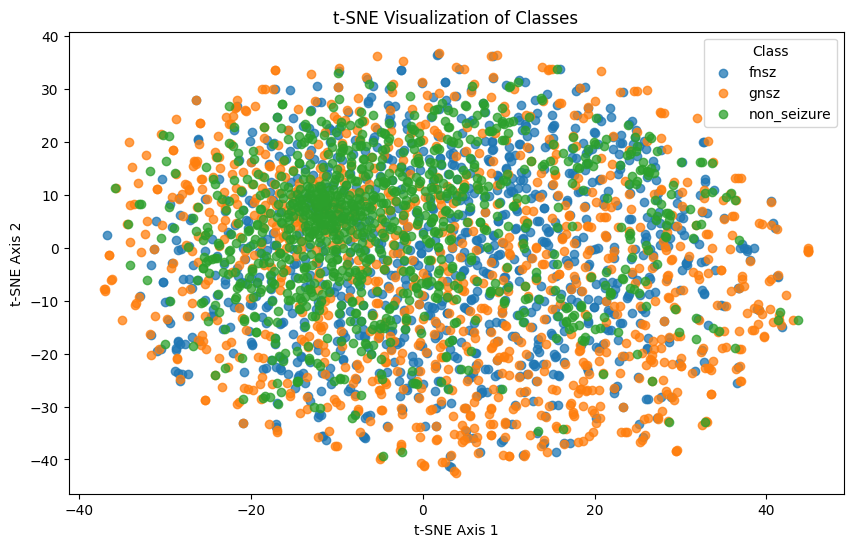

In [39]:
plot_tsne('../data/train_250hz_05_70_n60_CZ/', ['fnsz', 'gnsz', 'non_seizure'], 1000)

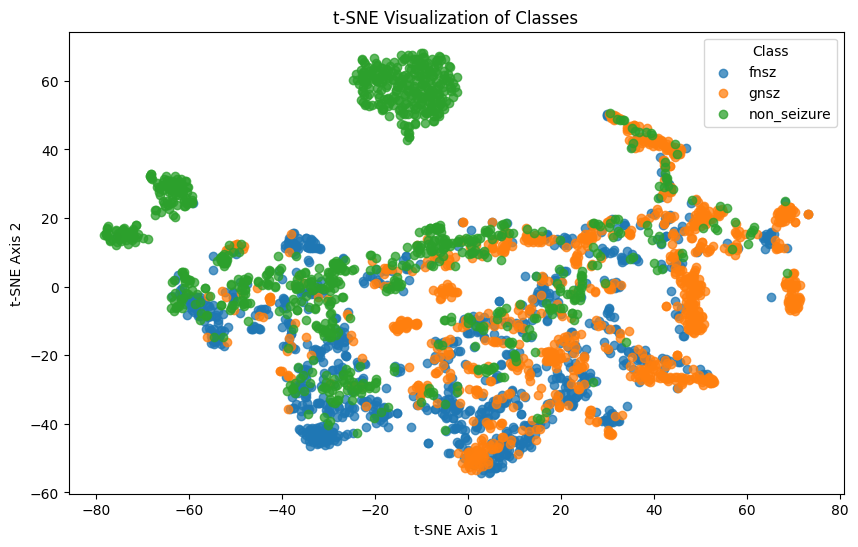

In [40]:
plot_tsne('../data/train_250hz_05_70_n60_CZ/', ['fnsz', 'gnsz', 'non_seizure'], 1000, psd=True)